In [ ]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/fraudTrain.csv')
test_data = pd.read_csv('/content/fraudTest.csv')

# View basic information
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170729 entries, 0 to 170728
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             170729 non-null  int64  
 1   trans_date_trans_time  170728 non-null  object 
 2   cc_num                 170728 non-null  float64
 3   merchant               170728 non-null  object 
 4   category               170728 non-null  object 
 5   amt                    170728 non-null  float64
 6   first                  170728 non-null  object 
 7   last                   170728 non-null  object 
 8   gender                 170728 non-null  object 
 9   street                 170728 non-null  object 
 10  city                   170728 non-null  object 
 11  state                  170728 non-null  object 
 12  zip                    170728 non-null  float64
 13  lat                    170728 non-null  float64
 14  long                   170728 non-nu

In [ ]:
print("Missing values in train_data:")
print(train_data.isnull().sum())

print("Missing values in test_data:")
print(test_data.isnull().sum())

Missing values in train_data:
Unnamed: 0               0
trans_date_trans_time    1
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
Missing values in test_data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state     

In [ ]:
print("Duplicate rows in train_data:", train_data.duplicated().sum())
print("Duplicate rows in test_data:", test_data.duplicated().sum())

Duplicate rows in train_data: 0
Duplicate rows in test_data: 0


# EDA


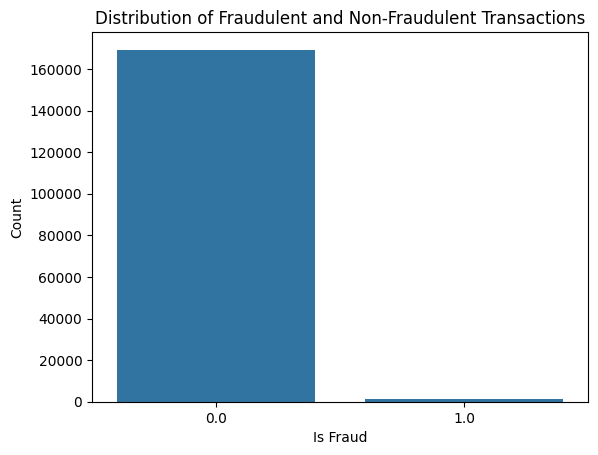

Fraudulent transactions percentage:
 is_fraud
0.0    99.118481
1.0     0.881519
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# Display percentage of fraud
fraud_percentage = train_data['is_fraud'].value_counts(normalize=True) * 100
print("Fraudulent transactions percentage:\n", fraud_percentage)

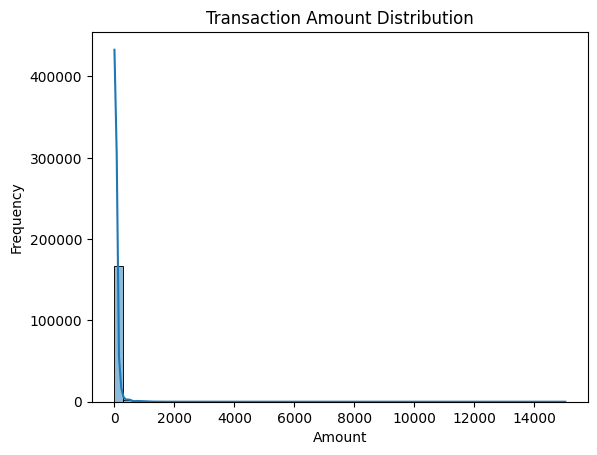

In [ ]:
sns.histplot(train_data['amt'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

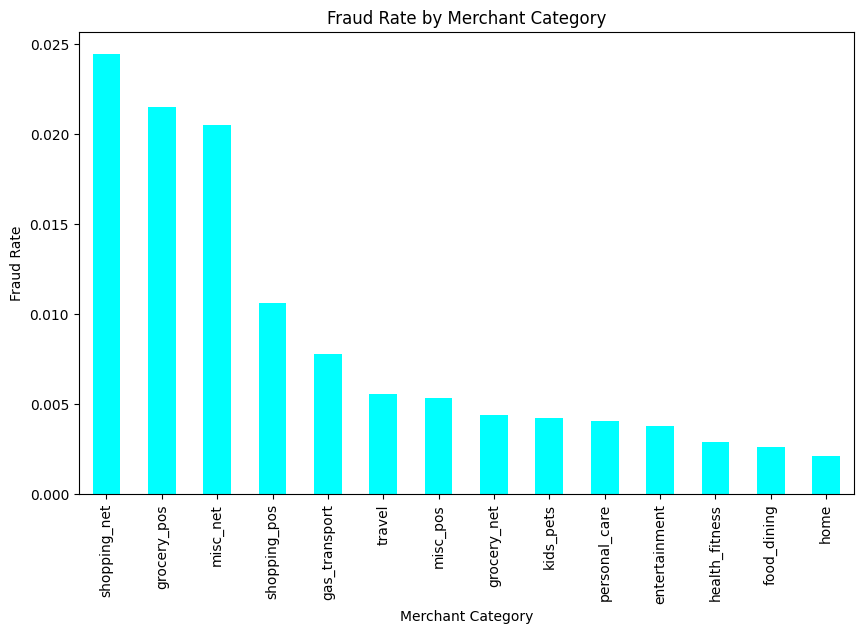

In [ ]:
fraud_rate_by_category = train_data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

fraud_rate_by_category.plot(kind='bar', figsize=(10, 6), color='cyan')
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.show()

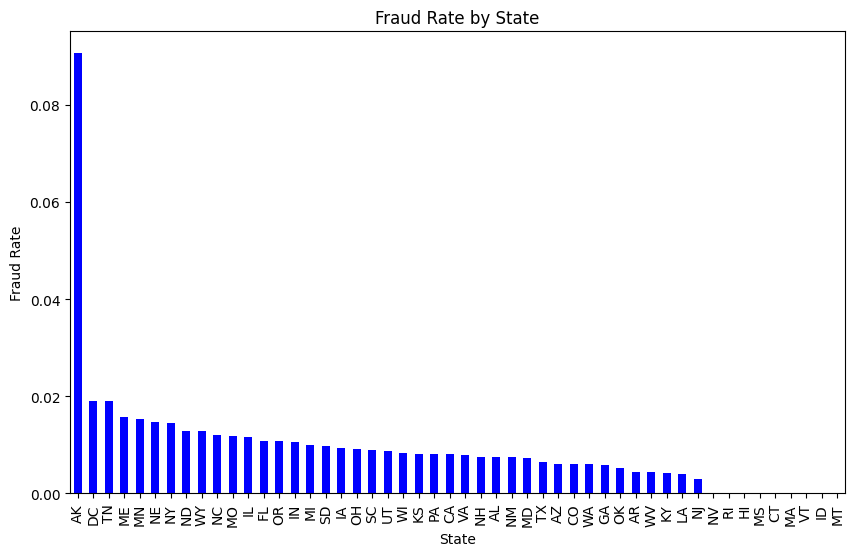

In [ ]:
fraud_rate_by_state = train_data.groupby('state')['is_fraud'].mean().sort_values(ascending=False)

fraud_rate_by_state.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Fraud Rate by State')
plt.xlabel('State')
plt.ylabel('Fraud Rate')
plt.show()

In [ ]:
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour

fraud_by_hour = train_data[train_data['is_fraud'] == 1].groupby('hour').size()
fraud_by_hour.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

ValueError: time data "13-01-2019 00:00" doesn't match format "%m-%d-%Y %H:%M", at position 11324. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

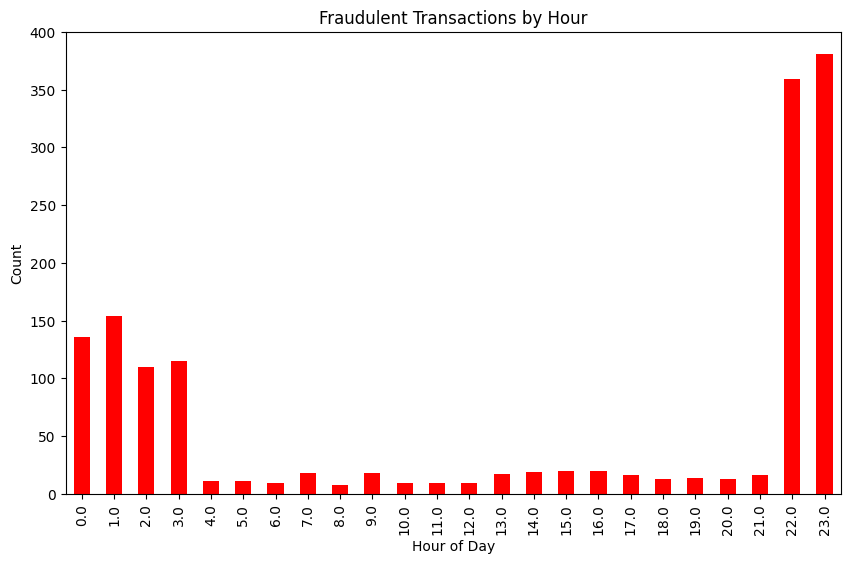

In [ ]:
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.hour

fraud_by_hour = train_data[train_data['is_fraud'] == 1].groupby('hour').size()
fraud_by_hour.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Fraudulent Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


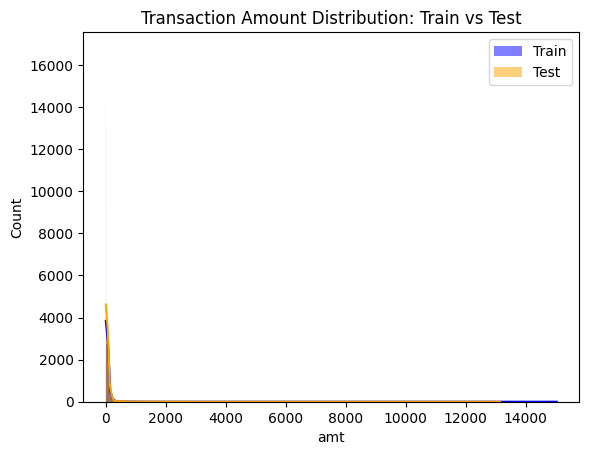

In [ ]:
# Compare amount distribution
sns.histplot(train_data['amt'], color='blue', label='Train', kde=True)
sns.histplot(test_data['amt'], color='orange', label='Test', kde=True)
plt.title('Transaction Amount Distribution: Train vs Test')
plt.legend()
plt.show()

# Feature Engineering


In [ ]:
# Convert the transaction time to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

ValueError: time data "13-01-2019 00:00" doesn't match format "%m-%d-%Y %H:%M", at position 11324. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Convert the transaction time to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

In [ ]:
# Extract hour, day, and month
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day_of_week'] = train_data['trans_date_trans_time'].dt.dayofweek
train_data['month'] = train_data['trans_date_trans_time'].dt.month

test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['day_of_week'] = test_data['trans_date_trans_time'].dt.dayofweek
test_data['month'] = test_data['trans_date_trans_time'].dt.month

In [ ]:
# Create bins for transaction amounts
bins = [0, 50, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme', 'Outlier']

train_data['amount_category'] = pd.cut(train_data['amt'], bins=bins, labels=labels)
test_data['amount_category'] = pd.cut(test_data['amt'], bins=bins, labels=labels)

In [ ]:
# Transaction counts per merchant
merchant_counts = train_data['merchant'].value_counts()
train_data['merchant_freq'] = train_data['merchant'].map(merchant_counts)
test_data['merchant_freq'] = test_data['merchant'].map(merchant_counts)

In [ ]:
# Transaction counts per state
state_counts = train_data['state'].value_counts()
train_data['state_freq'] = train_data['state'].map(state_counts)
test_data['state_freq'] = test_data['state'].map(state_counts)

In [ ]:
# Interaction between amount and merchant frequency
train_data['amt_merchant_freq'] = train_data['amt'] * train_data['merchant_freq']
test_data['amt_merchant_freq'] = test_data['amt'] * test_data['merchant_freq']

train_data = pd.get_dummies(train_data, columns=['category', 'amount_category'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['category', 'amount_category'], drop_first=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['merchant'] = le.fit_transform(train_data['merchant'])
test_data['merchant'] = le.transform(test_data['merchant'])

In [ ]:
features = [
    'amt', 'hour', 'day_of_week', 'month', 'merchant_freq',
    'state_freq', 'amt_merchant_freq'
]
X_train = train_data[features]
y_train = train_data['is_fraud']

X_test = test_data[features]

# NEW LIFE


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [ ]:
train = pd.read_csv('/content/fraudTrain.csv')
test = pd.read_csv('/content/fraudTest.csv')
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
print(test.shape),print(train.shape)

(555719, 23)
(1048575, 23)


(None, None)

In [ ]:
train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

# Converting dob,trans_date_trans_time column in both test & train to datetime data type and creating new 'trans_date' column -

In [ ]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

ValueError: time data "13-01-2019 00:00" doesn't match format "%m-%d-%Y %H:%M", at position 11324. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

ValueError: time data "21-06-1978" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

ValueError: time data "21-06-1978" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'], format='%d-%m-%Y')

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'], format='%d-%m-%Y %H:%M')
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'], format='%d-%m-%Y')

In [ ]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [ ]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:00,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:00,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


# EDA, Feature Engineering
# Categorical Variable Analysis

In [ ]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1604294 non-null  datetime64[ns]
 1   cc_num                 1604294 non-null  float64       
 2   merchant               1604294 non-null  object        
 3   category               1604294 non-null  object        
 4   amt                    1604294 non-null  float64       
 5   first                  1604294 non-null  object        
 6   last                   1604294 non-null  object        
 7   gender                 1604294 non-null  object        
 8   street                 1604294 non-null  object        
 9   city                   1604294 non-null  object        
 10  state                  1604294 non-null  object        
 11  zip                    1604294 non-null  int64         
 12  lat                    1604294 no

In [ ]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

,is_fraud_cat
0,F
1,F
2,F
3,F
4,F
...,...
1048570,F
1048571,F
1048572,F
1048573,F


In [ ]:
totalcat=total.select_dtypes(include=['object'])

In [ ]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
1048570,fraud_Fadel Inc,health_fitness,Haley,Wagner,F,05561 Farrell Crescent,Annapolis,MD,"Accountant, chartered certified",45ecd198c65e81e597db22e8d2ef7361,F
1048571,"fraud_Cremin, Hamill and Reichel",misc_pos,Meredith,Campbell,F,043 Hanson Turnpike,Hedrick,IA,Geochemist,c00ce51c6ebb7657474a77b9e0b51f34,F
1048572,"fraud_O'Connell, Botsford and Hand",home,Susan,Mills,F,005 Cody Estates,Louisville,KY,Engineering geologist,17c9dc8b2a6449ca2473726346e58e6c,F
1048573,fraud_Thompson-Gleason,health_fitness,Julia,Bell,F,576 House Crossroad,West Sayville,NY,Film/video editor,5ca650881b48a6a38754f841c23b77ab,F


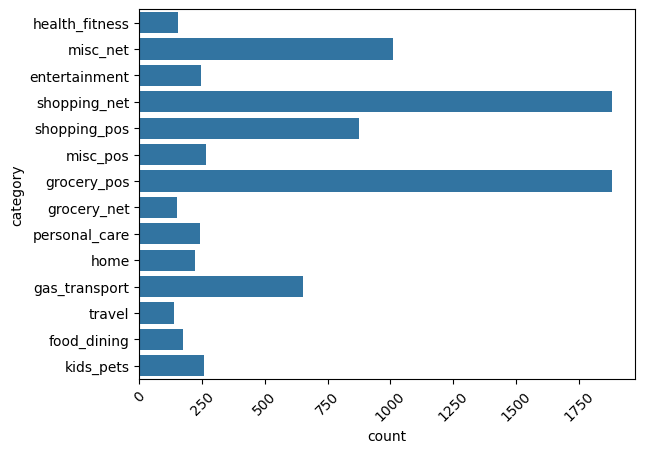

In [ ]:
sns.countplot(total[total['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

# Insight-
# Most frauds occured in categories of shopping_net and grocery_pos

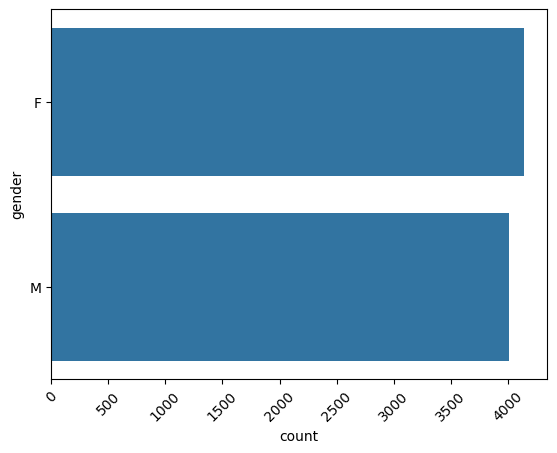

In [ ]:
sns.countplot(total[total['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

# Insight-
#Although more cases of fraud happened with female customers, the number is almost the same for both Males and Females

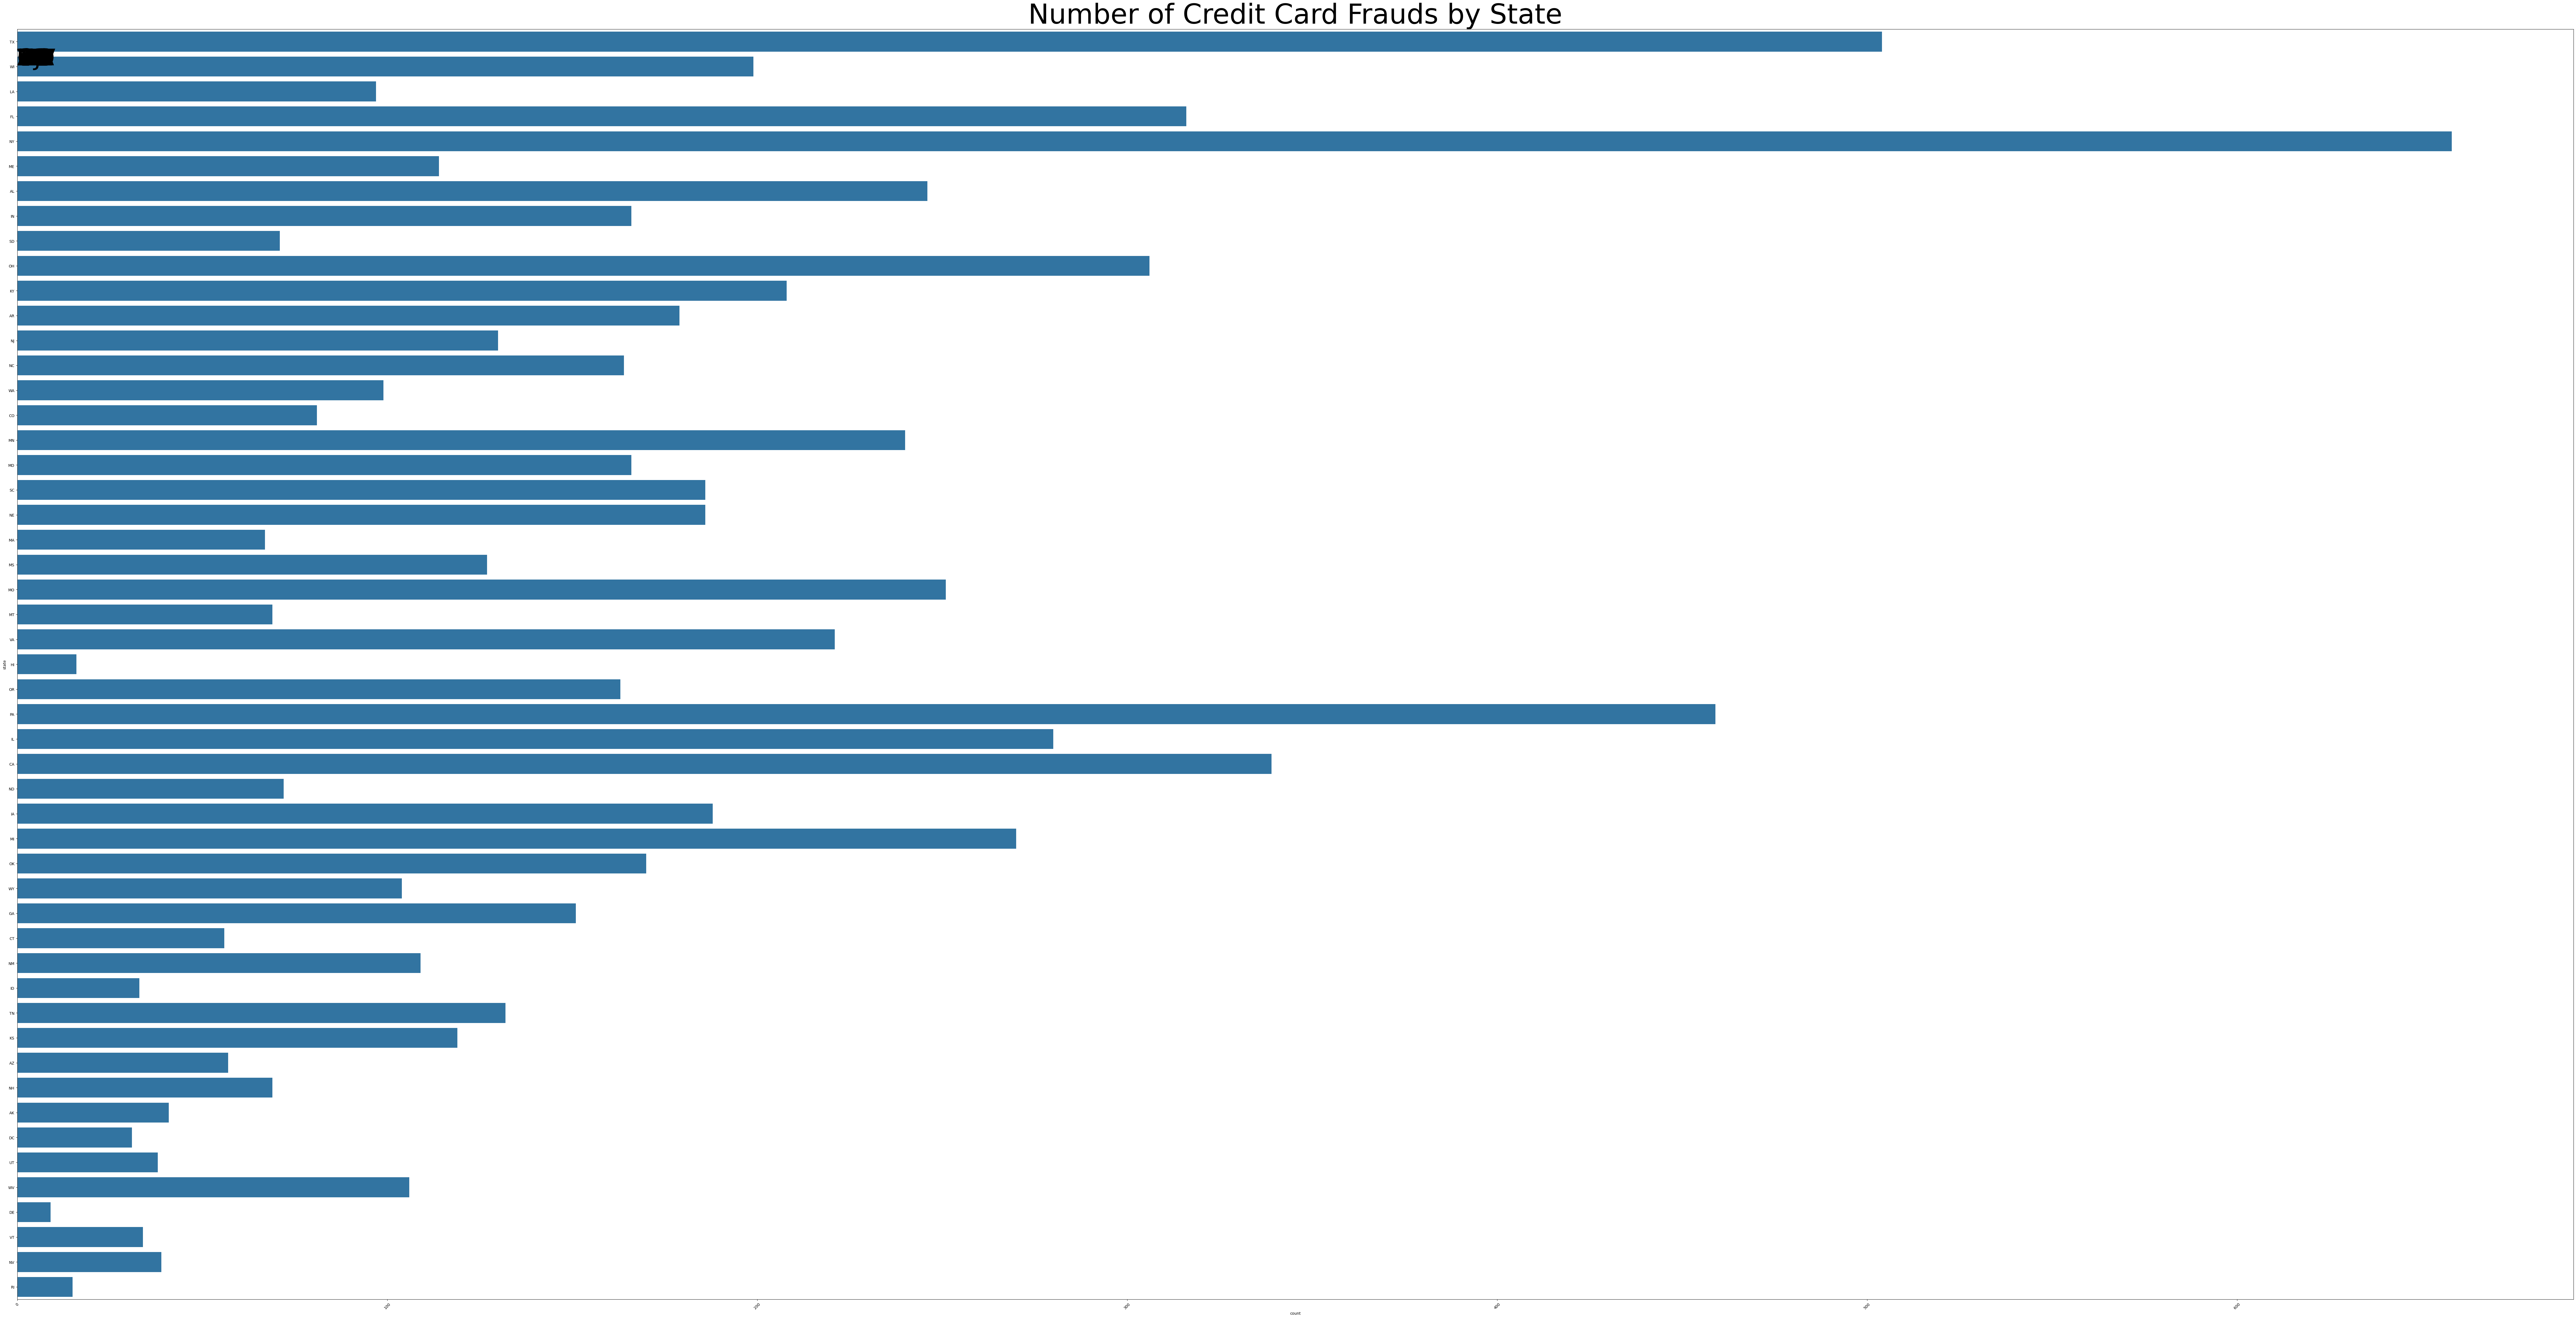

In [ ]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(total[total['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

# Insight-
# States OH, TX and LA report the most number of credit card frauds

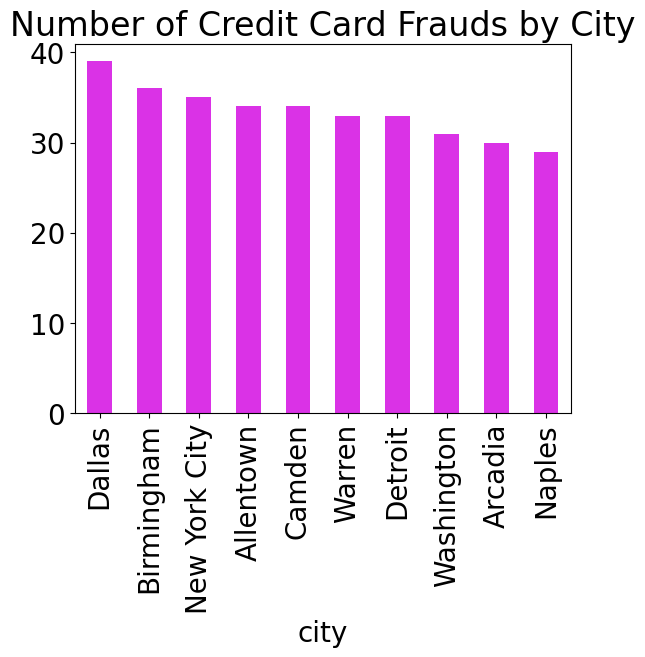

In [ ]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

# Insight-¶
# Dallas,Houston and Birmingham report the most frauds city wise.

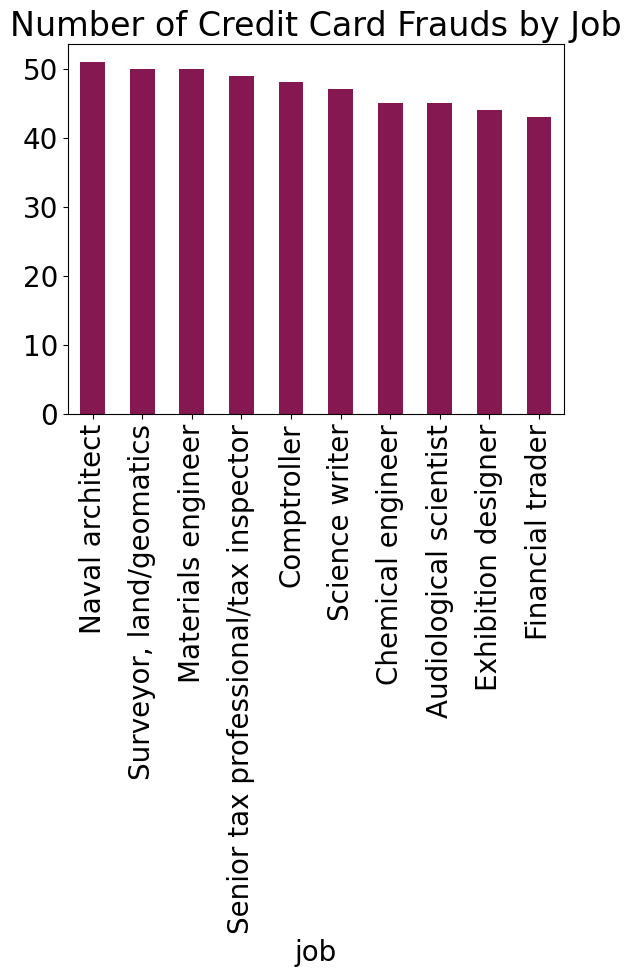

In [ ]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job")
plt.show()

# Insight-
# Most frauds occured in jobs of quantity surveyor followed by naval architect and materials engineer

# Numerical Variable Analysis
# checking the spread & skewness of all numerical variables

In [ ]:
del total['is_fraud_cat']
from scipy.stats import norm, skew

In [ ]:
#finding numerical columns
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2.290000e+15,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3.570000e+15,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3.600000e+15,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3.590000e+15,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3.530000e+15,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,3.060000e+13,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,3.560000e+15,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,6.010000e+15,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,4.080000e+12,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [ ]:
total.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


In [ ]:
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1604294 non-null  float64
 1   amt         1604294 non-null  float64
 2   zip         1604294 non-null  int64  
 3   lat         1604294 non-null  float64
 4   long        1604294 non-null  float64
 5   city_pop    1604294 non-null  int64  
 6   unix_time   1604294 non-null  int64  
 7   merch_lat   1604294 non-null  float64
 8   merch_long  1604294 non-null  float64
 9   is_fraud    1604294 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 134.6 MB


<ipython-input-44-07a7571e4e81>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['amt'],fit = norm,color = randomcolor())


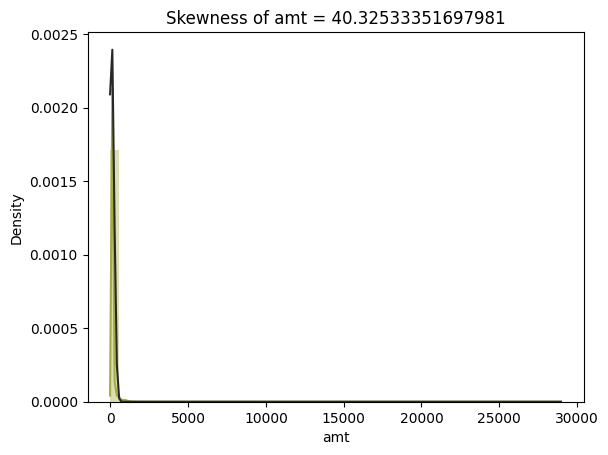

In [ ]:
plt.rcParams.update({'font.size': 10})
skewness = str(skew(total['amt']))
sns.distplot(total['amt'],fit = norm,color = randomcolor())
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

# Inference:
# Most transactions are limited within a very small bracket, although transactions of large sums are very much present, which are likely to be fraud transactions.

<ipython-input-45-0801df2f94fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['city_pop'],fit = norm,color = randomcolor())


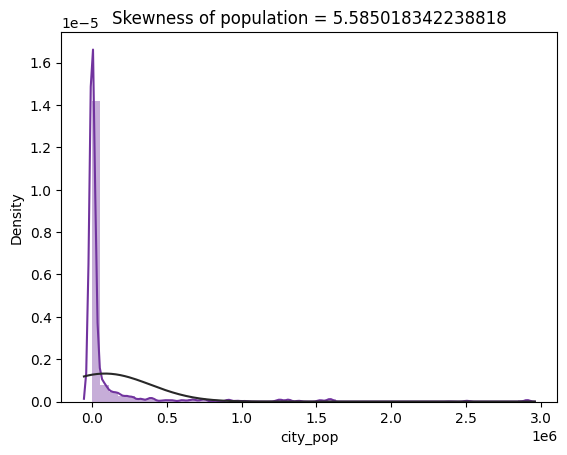

In [ ]:
skewness = str(skew(total['city_pop']))
sns.distplot(total['city_pop'],fit = norm,color = randomcolor())
plt.title("Skewness of population"+" = "+skewness)
plt.show()

<ipython-input-46-362b4e4d61e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())


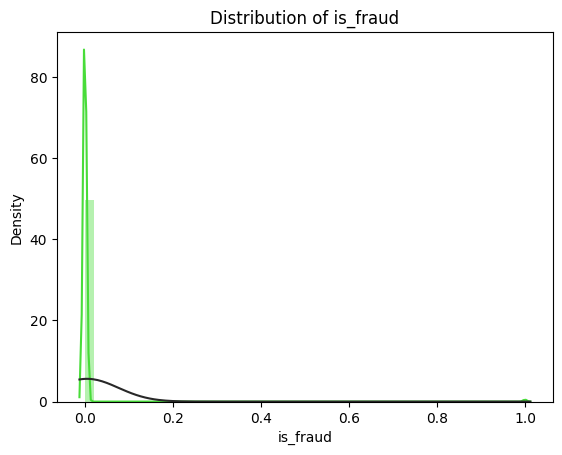

In [ ]:
sns.distplot(total['is_fraud'],fit = norm,color = randomcolor())
plt.title("Distribution of is_fraud")
plt.show()

# Certain numerical columns are not needed for modeling and hence can be removed.

# Moreover,a lot of the data is highly skewed.

# one insight is that proportion of non fraud transactions are much much larger than fraud transactions so we are looking at an imbalanced dataset.

In [ ]:
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1604294 non-null  datetime64[ns]
 1   category               1604294 non-null  object        
 2   amt                    1604294 non-null  float64       
 3   gender                 1604294 non-null  object        
 4   city                   1604294 non-null  object        
 5   state                  1604294 non-null  object        
 6   lat                    1604294 non-null  float64       
 7   long                   1604294 non-null  float64       
 8   city_pop               1604294 non-null  int64         
 9   job                    1604294 non-null  object        
 10  dob                    1604294 non-null  datetime64[ns]
 11  merch_lat              1604294 non-null  float64       
 12  merch_long             1604294 no

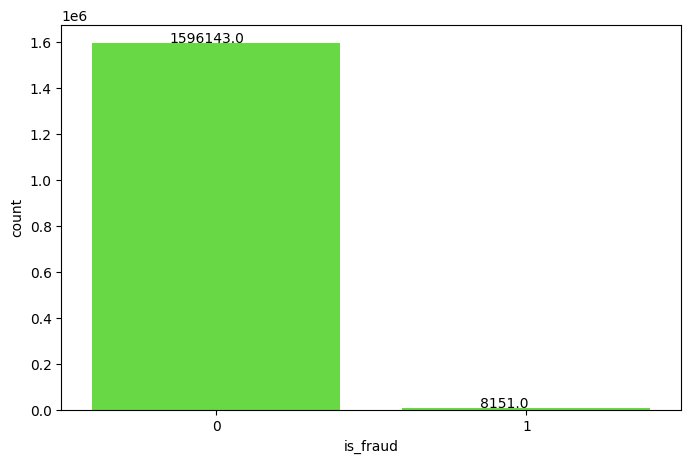

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="is_fraud", data=total,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# only around 10,000 entries represent fraud transactions out of nearly 1.8 million entries, hence we are looking at an imbalanced dataset.

# creating age variable from transaction dates and DOB.

In [ ]:
total["age"] = total["trans_date"]-total["dob"]
total["age"]=total["age"].astype('timedelta64[Y]')
total["age"].head()

ValueError: Cannot convert from timedelta64[ns] to timedelta64[Y]. Supported resolutions are 's', 'ms', 'us', 'ns'

In [ ]:
total["age"] = (total["trans_date"] - total["dob"]).dt.days / 365.25
total["age"].head()

,age
0,52.257358
1,30.425736
2,49.667351
3,32.908966
4,64.960986


In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1604294 non-null  datetime64[ns]
 1   category               1604294 non-null  object        
 2   amt                    1604294 non-null  float64       
 3   gender                 1604294 non-null  object        
 4   city                   1604294 non-null  object        
 5   state                  1604294 non-null  object        
 6   lat                    1604294 non-null  float64       
 7   long                   1604294 non-null  float64       
 8   city_pop               1604294 non-null  int64         
 9   job                    1604294 non-null  object        
 10  dob                    1604294 non-null  datetime64[ns]
 11  merch_lat              1604294 non-null  float64       
 12  merch_long             1604294 no

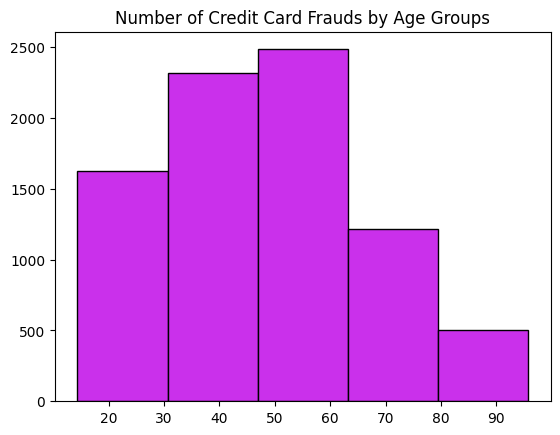

In [ ]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

In [ ]:
# creating transacation month and transaction year columns

In [ ]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [ ]:
import calendar
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

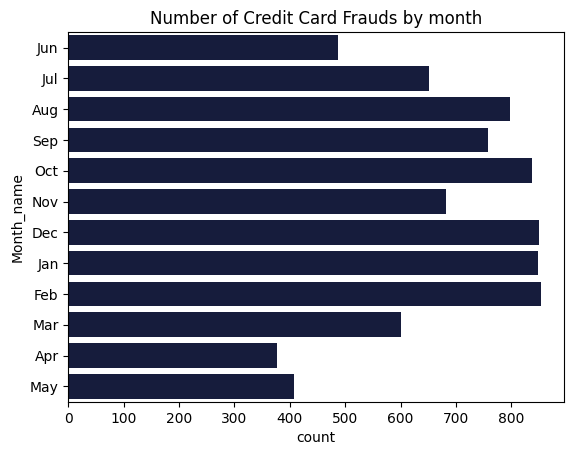

In [ ]:
sns.countplot(total[total["is_fraud"]==1]["Month_name"],color=randomcolor())
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

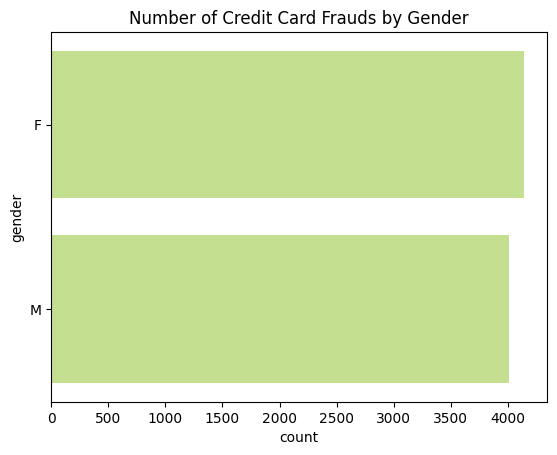

In [ ]:
sns.countplot(total[total["is_fraud"]==1]["gender"],color=randomcolor())
plt.title("Number of Credit Card Frauds by Gender")
plt.show()

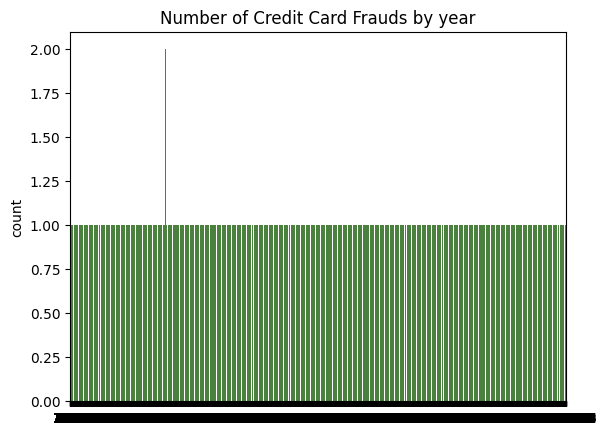

In [ ]:
sns.countplot(total[total["is_fraud"]==1]["trans_year"],color=randomcolor())
plt.title("Number of Credit Card Frauds by year")
plt.show()

In [ ]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

In [ ]:
total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))

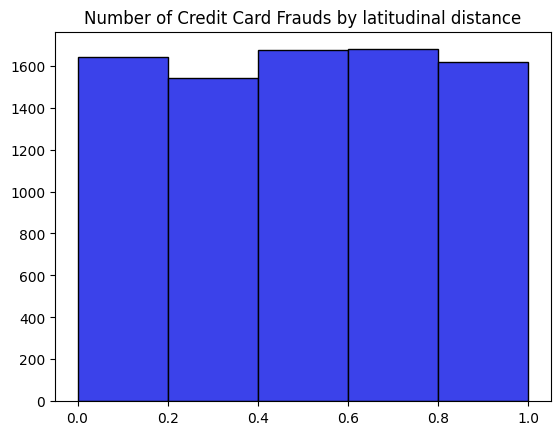

In [ ]:
fraud = total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()

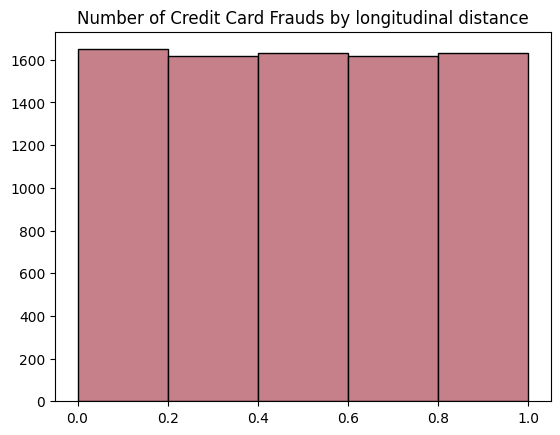

In [ ]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by longitudinal distance")
plt.show()

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1604294 non-null  datetime64[ns]
 1   category               1604294 non-null  object        
 2   amt                    1604294 non-null  float64       
 3   gender                 1604294 non-null  object        
 4   city                   1604294 non-null  object        
 5   state                  1604294 non-null  object        
 6   lat                    1604294 non-null  float64       
 7   long                   1604294 non-null  float64       
 8   city_pop               1604294 non-null  int64         
 9   job                    1604294 non-null  object        
 10  dob                    1604294 non-null  datetime64[ns]
 11  merch_lat              1604294 non-null  float64       
 12  merch_long             1604294 no

In [ ]:
# changing gender values to binary values

In [ ]:
total.gender.value_counts()

,count
gender,
F,878854
M,725440


In [ ]:
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

,count
gender,
0,878854
1,725440


In [ ]:
# Dropping final set of variables not useful for model building

In [ ]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
total=total.drop(drop_cols,axis=1)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   category               1604294 non-null  object 
 1   amt                    1604294 non-null  float64
 2   gender                 1604294 non-null  int64  
 3   city_pop               1604294 non-null  int64  
 4   is_fraud               1604294 non-null  int64  
 5   age                    1604294 non-null  float64
 6   trans_month            1604294 non-null  int32  
 7   trans_year             1604294 non-null  int32  
 8   latitudinal_distance   1604294 non-null  float64
 9   longitudinal_distance  1604294 non-null  float64
dtypes: float64(4), int32(2), int64(3), object(1)
memory usage: 122.4+ MB


In [ ]:
total = pd.get_dummies(total,columns=['category'],drop_first=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1604294 non-null  float64
 1   gender                   1604294 non-null  int64  
 2   city_pop                 1604294 non-null  int64  
 3   is_fraud                 1604294 non-null  int64  
 4   age                      1604294 non-null  float64
 5   trans_month              1604294 non-null  int32  
 6   trans_year               1604294 non-null  int32  
 7   latitudinal_distance     1604294 non-null  float64
 8   longitudinal_distance    1604294 non-null  float64
 9   category_food_dining     1604294 non-null  bool   
 10  category_gas_transport   1604294 non-null  bool   
 11  category_grocery_net     1604294 non-null  bool   
 12  category_grocery_pos     1604294 non-null  bool   
 13  category_health_fitness  1604294 non-null  bool

In [ ]:
total.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52.257358,6,2020,0.020,0.265,False,...,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0,30.425736,6,2020,0.870,0.476,False,...,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0,49.667351,6,2020,0.177,0.660,False,...,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0,32.908966,6,2020,0.243,0.064,False,...,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0,64.960986,6,2020,0.706,0.868,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Correcting the imbalance discovered by using resample

In [ ]:
from sklearn.utils import resample

In [ ]:
#create two different dataframe of majority and minority class
df_majority = total[(total['is_fraud']==0)]
df_minority = total[(total['is_fraud']==1)]

df_majority.shape,df_minority.shape

((1596143, 22), (8151, 22))

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1842743, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled.shape

(1842743, 22)

In [ ]:
# Combine majority class with upsampled minority class
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape

(3438886, 22)

In [ ]:
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols

['amt',
 'gender',
 'city_pop',
 'age',
 'trans_month',
 'trans_year',
 'latitudinal_distance',
 'longitudinal_distance',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [ ]:
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3438886 entries, 909017 to 1048574
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   city_pop                 int64  
 3   age                      float64
 4   trans_month              int32  
 5   trans_year               int32  
 6   latitudinal_distance     float64
 7   longitudinal_distance    float64
 8   category_food_dining     bool   
 9   category_gas_transport   bool   
 10  category_grocery_net     bool   
 11  category_grocery_pos     bool   
 12  category_health_fitness  bool   
 13  category_home            bool   
 14  category_kids_pets       bool   
 15  category_misc_net        bool   
 16  category_misc_pos        bool   
 17  category_personal_care   bool   
 18  category_shopping_net    bool   
 19  category_shopping_pos    bool   
 20  category_travel          bool   
dtypes: bool(

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay # Changed import here
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV

In [ ]:
# Scaling the x variables

In [ ]:
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [ ]:
#Feature Importance

In [ ]:
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
0,amt,4.147736
9,category_gas_transport,0.857926
11,category_grocery_pos,0.725402
17,category_personal_care,0.500406
14,category_kids_pets,0.489228
16,category_misc_pos,0.480031
10,category_grocery_net,0.418225
20,category_travel,0.414813
12,category_health_fitness,0.372160
8,category_food_dining,0.339884


In [ ]:
# Logistic Regression

In [ ]:
Logit1=LogisticRegression(solver='liblinear')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred))
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-train and Y-train is :  68.08 %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Score of the model with X-test and Y-test is :  67.99 %
 Mean absolute error is  0.19222403374735622
 Mean squared  error is  0.19222403374735622
 Median absolute error is  0.0
Accuracy is  80.78 %
F1 score:  80.78 %


In [ ]:
# Fine Tuning

In [ ]:
X_train_new=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test_new=X_test[[x for x in feature[feature["importance"]>0].column]]

In [ ]:
# checking p values & variance inflation factor

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_sm = sm.add_constant(X_train_new)
logm = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# checking p values & variance inflation factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_train_new has numeric dtype
X_train_new = X_train[[x for x in feature[feature["importance"]>0].column]].astype(float)
X_test_new = X_test[[x for x in feature[feature["importance"]>0].column]].astype(float)


X_train_sm = sm.add_constant(X_train_new)
logm = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              2407220
Model:                            GLM   Df Residuals:                  2407206
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.9881e+05
Date:                Thu, 09 Jan 2025   Deviance:                   1.7976e+06
Time:                        11:09:35   Pearson chi2:                 9.65e+17
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4697
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.2101      0.011   -367.250      0.000      -4.233      -4.188
amt                         0.0102   1.78e-05    573.761      0.000       0.010       0.010
category_gas_transport      3.6798      0.010    353.508      0.000       3.659       3.700
category_grocery_pos        2.7218      0.008    326.164      0.000       2.705       2.738
category_personal_care      3.0224      0.011    266.236      0.000       3.000       3.045
category_kids_pets          2.8051      0.011    252.909      0.000       2.783       2.827
category_misc_pos           2.9683      0.012    250.178      0.000       2.945       2.992
category_grocery_net        3.2861      0.013    261.761      0.000       3.261       3.311
category_travel             3.4099      0.013    252.669      0.000       3.383       3.436
category_health_fitness     2.5666      0.012    214.736      0.000       2.543       2.590
category_food_dining        2.3664      0.011    206.610      0.000       2.344       2.389
category_home               1.7523      0.011    164.011      0.000       1.731       1.773
latitudinal_distance        0.0457      0.006      7.154      0.000       0.033       0.058
age                         0.0002      0.000      2.013      0.044    5.61e-06       0.000
===========================================================================================
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
12,age,4.88
11,latitudinal_distance,3.32
0,amt,2.28
2,category_grocery_pos,1.45
1,category_gas_transport,1.37
4,category_kids_pets,1.21
3,category_personal_care,1.19
10,category_home,1.19
8,category_health_fitness,1.15
9,category_food_dining,1.15


In [ ]:
X_train_new.columns

Index(['amt', 'category_gas_transport', 'category_grocery_pos',
       'category_personal_care', 'category_kids_pets', 'category_misc_pos',
       'category_grocery_net', 'category_travel', 'category_health_fitness',
       'category_food_dining', 'category_home', 'latitudinal_distance', 'age'],
      dtype='object')

In [ ]:
# since all columns have VIF < 5 , we'll continue with all columns

In [ ]:
#x_train_vif_adj = X_train_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_train_vif_adj = X_train_new
#x_test_vif_adj = X_test_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_test_vif_adj = X_test_new

In [ ]:
# Scaling the new test and train sets

In [ ]:
sc= StandardScaler()
X_train_vif_adj_std=sc.fit_transform(x_train_vif_adj)
X_test_vif_adj_std = sc.fit_transform(x_test_vif_adj)

In [ ]:
X_test_vif_adj_std

array([[ 0.01584954, -0.31588491,  2.22951531, ..., -0.24874525,
         0.24833253,  0.25538055],
       [-0.76026837, -0.31588491, -0.44852798, ..., -0.24874525,
         0.9263184 , -0.03834891],
       [ 1.04865119, -0.31588491, -0.44852798, ..., -0.24874525,
        -0.71475508, -0.31625865],
       ...,
       [-0.81594071, -0.31588491, -0.44852798, ..., -0.24874525,
        -0.12716733, -0.30226429],
       [ 1.50574489, -0.31588491, -0.44852798, ..., -0.24874525,
         0.83244343, -0.66718245],
       [ 0.06804399, -0.31588491,  2.22951531, ..., -0.24874525,
        -1.57353717,  0.68555502]])

In [ ]:
Y_train

,is_fraud
265153,1
683805,0
546173,0
803947,1
209953,0
...,...
1035336,1
515727,0
388116,0
374509,0


In [ ]:
Logit2=LogisticRegression(solver='liblinear')

Logit2.fit(X_train_vif_adj_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit2.score(X_train_vif_adj_std,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit2.score(X_test_vif_adj_std,Y_test)*100,2)),"%")

Y_pred=Logit2.predict(X_test_vif_adj_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred))
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  79.51 %
Score of the model with X-test and Y-test is :  79.54 %
 Mean absolute error is  0.20456329858694577
 Mean squared  error is  0.20456329858694577
 Median absolute error is  0.0
Accuracy is  79.54 %
F1 score:  79.55 %


In [ ]:
matrix = confusion_matrix(Y_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(Y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[411940 140799]
 [ 70242 408685]]
Outcome values : 
 411940 140799 70242 408685
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.75      0.80    552739
           0       0.74      0.85      0.79    478927

    accuracy                           0.80   1031666
   macro avg       0.80      0.80      0.80   1031666
weighted avg       0.80      0.80      0.80   1031666



In [ ]:
plot_roc_curve(Logit2, X_test_vif_adj_std, Y_test)
plt.show()

NameError: name 'plot_roc_curve' is not defined

In [ ]:
# Consolidated imports at the beginning of the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import calendar
import random

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

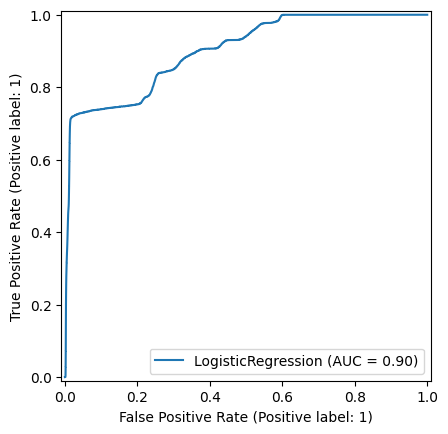

In [ ]:
RocCurveDisplay.from_estimator(Logit2, X_test_vif_adj_std, Y_test)
plt.show()